In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = train.drop(columns=['Unnamed: 0', 'id'])
test = test.drop(columns=['Unnamed: 0', 'id'])

# Look at the first few rows
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

Here is something very important. We can see that there are 5 object columns, which means we actually need to prepare the data in order to be able to analyze it. Also the 21. Col is a float64 which means increased precision.

### Info Analysis
All columns are complete except the 21. Arrival Delay in Minutes, which is missing 310 entries. Considering the total amount of entries being 103.904 it only accounts for 0.00298 percent. We will still remove it.

In [7]:
train.dropna(axis=0, inplace=True)

In [18]:
# Source - https://stackoverflow.com/a
# Posted by Walid
# Retrieved 2026-01-21, License - CC BY-SA 4.0
print(train['Gender'].value_counts())
print()
print(train['Customer Type'].value_counts())
print()
print(train['Type of Travel'].value_counts())
print()
print(train['Class'].value_counts())
print()
print(train['satisfaction'].value_counts())

Gender
Female    52576
Male      51018
Name: count, dtype: int64

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

satisfaction
0    58697
1    44897
Name: count, dtype: int64


In [21]:
def trans_gender(x):
    if x == 'Male':
        return 1
    elif x == 'Female':
        return 0
    else:
        return -1

def trans_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1

def trans_type_of_travel(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1

def trans_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1

def trans_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

train['Gender'] = train['Gender'].apply(trans_gender)
train['Customer Type'] = train['Customer Type'].apply(trans_customer_type)
train['Type of Travel'] = train['Type of Travel'].apply(trans_type_of_travel)
train['Class'] = train['Class'].apply(trans_class)
train['satisfaction'] = train['satisfaction'].apply(trans_satisfaction)

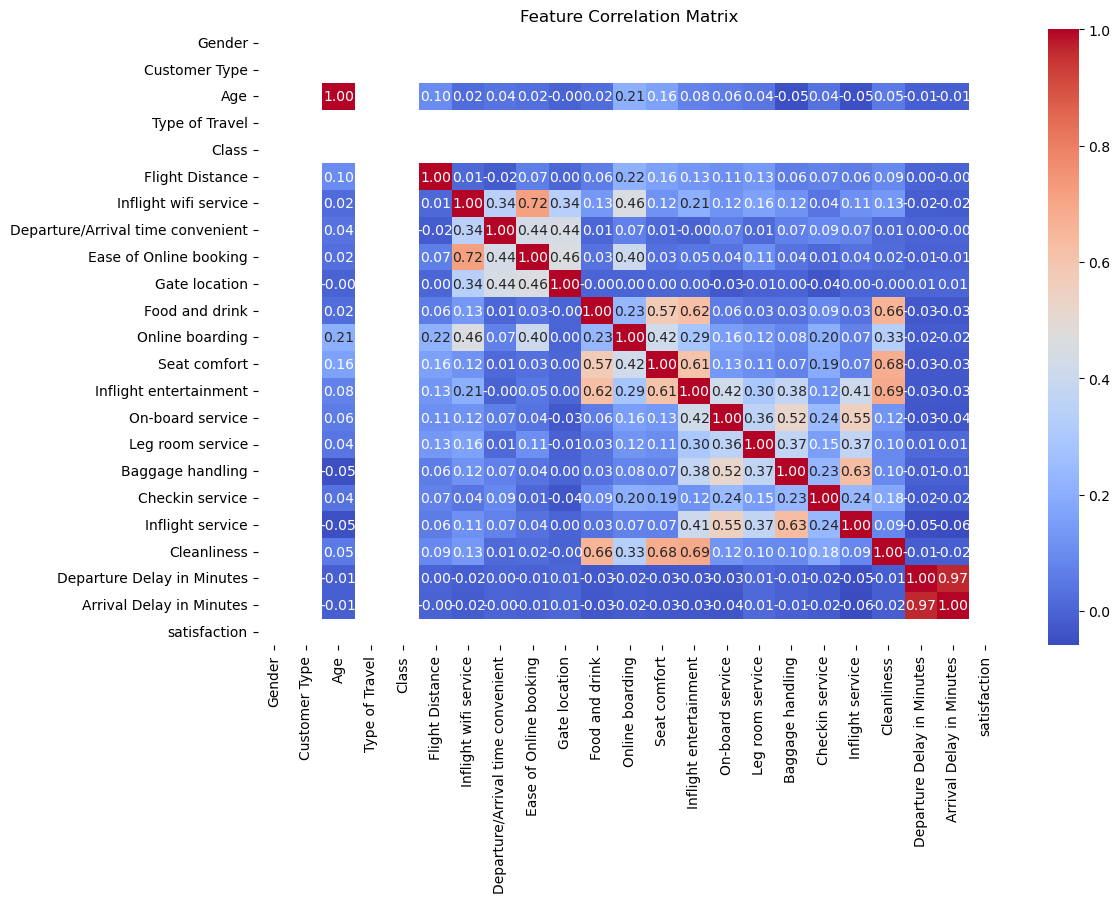

In [23]:
plt.figure(figsize=(12, 8))
# We only correlate numerical columns
correlation_matrix = train.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

### Correlations
The strongest correlations are of course **Departure Delay in Minutes** and **Arrival Delay in Minutes**, due to the fact of them having a clear causality. The more you delay you start with the later you arrive at your destination.

The most important thing to keep in mind is that the dataset comes from a survey conducted by the airline
Gate Location correlates with the following: **Inflight wifi service**, **Departure/Arrival time convenient**, **Ease of Online booking**
None the less we couldn't find any casaul connection to these cols.

